In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import imageio
import matplotlib.pyplot as plt
from skimage import color
from skimage.exposure import rescale_intensity

# extending Pandas view limits
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
!pwd

/content


## Manipulating Pill Images for Contrast Increse

In [46]:
pillpic = imageio.imread('backlv.png')

pillpic_gray = rescale_intensity(color.rgb2gray(pillpic))
pillpic_gray2 = rescale_intensity(1 - color.rgb2gray(pillpic))

pillpic_gray

array([[0.09967608, 0.09967608, 0.11536235, ..., 0.07950275, 0.08342431,
        0.09518902],
       [0.11144078, 0.11144078, 0.11536235, ..., 0.09126745, 0.09126745,
        0.09911059],
       [0.11536235, 0.11928392, 0.11144078, ..., 0.09126745, 0.09126745,
        0.09518902],
       ...,
       [0.08262078, 0.08654235, 0.09438549, ..., 0.07392941, 0.07813373,
        0.07392941],
       [0.08262078, 0.09046392, 0.09046392, ..., 0.08205529, 0.08205529,
        0.07392941],
       [0.07869922, 0.09046392, 0.09046392, ..., 0.07813373, 0.07029059,
        0.07029059]])

In [47]:
pillpic_gray.shape

(351, 600)

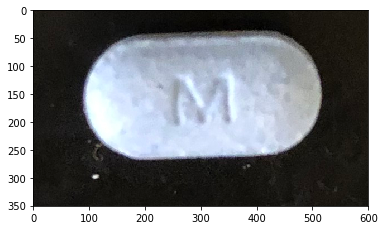

In [48]:
plt.imshow(pillpic);

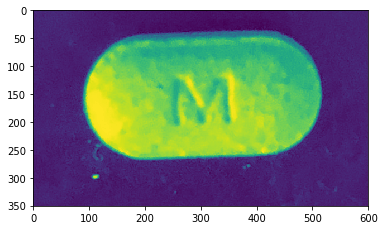

In [49]:
# THIS ONE IS ACTUALLY GRAY - NOT AS SHOWN!!!
plt.imshow(pillpic_gray);

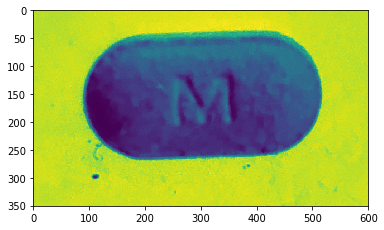

In [50]:
# THIS ONE IS ALSO GRAY - NOT AS SHOWN!!!
plt.imshow(pillpic_gray2);

In [51]:
# Saving images - GRAY IMAGE - NOT ENOUGH CONTRAST TO EXTRACT TEXT!!!
imageio.imwrite('./backlv4.png', pillpic_gray2)

In [52]:
# Saving images - GRAY IMAGE - NOT ENOUGH CONTRAST TO EXTRACT TEXT!!!
imageio.imwrite('./backlv4.png', pillpic_gray)

### Using Scikit-image

Will try to create same contrast as show in images above (that are actually gray)

**RGB to HSV:**

RGB to HSV (Hue, Saturation, Value) conversion 1 can be used to facilitate segmentation processes.

Usually, objects in images have distinct colors (hues) and luminosities, so that these features can be used to separate different areas of the image. In the RGB representation the hue and the luminosity are expressed as a linear combination of the R,G,B channels, whereas they correspond to single channels of the HSV image (the Hue and the Value channels). A simple segmentation of the image can then be effectively performed by a mere thresholding of the HSV channels.

In [0]:
from skimage.color import rgb2hsv

hsv_img = rgb2hsv(pillpic)

hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

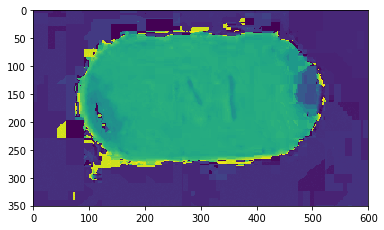

In [54]:
plt.imshow(hue_img);

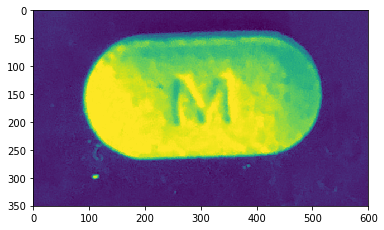

In [55]:
plt.imshow(value_img);

In [56]:
# Saving "heu" and "value" images
imageio.imwrite('./pill_hue.png', hue_img)
imageio.imwrite('./pill_value.png', value_img)

### Using OpenCV




In [57]:
!pip install opencv-python

Grayscalling Image & Detecting Edges

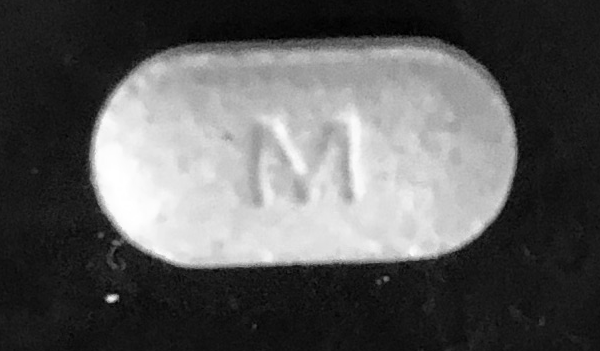

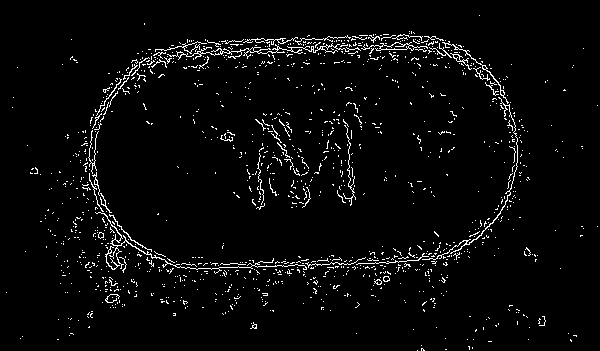

In [58]:
import cv2
import numpy
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow 

img = cv2.imread('backlv.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
edges = cv2.Canny(gray, 70,70)

cv2_imshow(gray) 
cv2_imshow(edges)

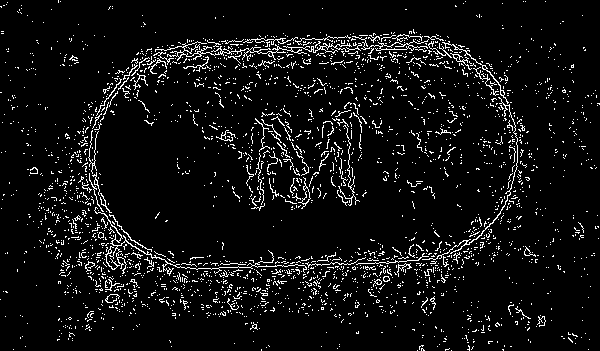

In [59]:
# Detecting edges using `pillpic_grayscale` from first iteration
edges2 = cv2.Canny(gray, 50,50)

cv2_imshow(edges2)

In [0]:
imageio.imwrite('./pill_edges.png', edges2)

## Wrangling Pill Box Database from U.S. National Library of Medicine

Loading Data

In [2]:
df = pd.read_csv('https://pillbox.nlm.nih.gov/downloads/pillbox_201805.tab', sep='\t')

In [3]:
df.head()

,id,spl_id,SETID,spp,NDC9,PRODUCT_CODE,EQUAL_PRODUCT_CODE,author,SPLIMPRINT,SPLCOLOR,SPLSHAPE,SPLSIZE,SPLSCORE,DEA_SCHEDULE_CODE,INGREDIENTS,SPL_INACTIVE_ING,RXCUI,RXTTY,RXSTRING,image_id,IMAGE_SOURCE,HAS_IMAGE,FROM_SIS,NO_RXCUI
0,35339,NaN,a6b39b0c-3fb5-461c-aeae-3653cea7b121,a6b39b0c-3fb5-461c-aeae-3653cea7b121-76237-185-0,762370185,76237-185,0406-0360,McKesson Contract Packaging,M360,C48325,C48345,19.0,2,C48676,HYDROCODONE BITARTRATE[HYDROCODONE]; ACETAMINO...,"CROSPOVIDONE / MAGNESIUM STEARATE / CELLULOSE,...",NaN,NaN,NaN,NaN,NaN,0,1.0,NaN
1,27070,NaN,54b7e667-bb24-49a6-940d-226b2990d91b,54b7e667-bb24-49a6-940d-226b2990d91b-0363-0773-0,003630773,0363-0773,NaN,Walgreens Co,CPC64;A5,C48326,C48348,7.0,1,NaN,PHENAZOPYRIDINE HYDROCHLORIDE[PHENAZOPYRIDINE],"MAGNESIUM STEARATE / CELLULOSE, MICROCRYSTALLI...",1094126.0,SCD,Phenazopyridine hydrochloride 95 MG Oral Tablet,NaN,NaN,0,NaN,NaN
2,45909,NaN,6c9ef53b-b65f-4ba6-b1b0-43e12e0d9b3d,6c9ef53b-b65f-4ba6-b1b0-43e12e0d9b3d-24236-995-0,242360995,24236-995,53746-190,REMEDYREPACK INC.,IP190;500,C48325,C48335,16.0,1,NaN,NAPROXEN[NAPROXEN],CROSCARMELLOSE SODIUM / MAGNESIUM STEARATE / P...,198014.0,NaN,Naproxen 500 MG Oral Tablet,NaN,NaN,0,1.0,NaN
3,48191,NaN,8b1ca232-f84f-4d8f-9751-b103aa9337fb,8b1ca232-f84f-4d8f-9751-b103aa9337fb-30142-886-2,301420886,30142-886,NaN,Kroger Company,L272,C48329,C48345,16.0,1,NaN,ACETAMINOPHEN[ACETAMINOPHEN]; PHENYLEPHRINE HY...,ACESULFAME POTASSIUM / CARNAUBA WAX / CROSPOVI...,1046799.0,GPCK,{12 (Acetaminophen 325 MG / Chlorpheniramine M...,NaN,NaN,0,NaN,NaN
4,28462,NaN,8c4c786c-2b0f-4a23-a87d-effbcfe0c857,8c4c786c-2b0f-4a23-a87d-effbcfe0c857-42507-054-0,425070054,42507-054,NaN,HyVee Inc,L054,C48325,C48336,18.0,1,NaN,PSEUDOEPHEDRINE HYDROCHLORIDE[PSEUDOEPHEDRINE],CARNAUBA WAX / SILICON DIOXIDE / CALCIUM PHOSP...,1049154.0,SCD,12 HR Pseudoephedrine Hydrochloride 120 MG Ext...,NaN,NaN,0,NaN,NaN


In [9]:
df.columns

Index(['id', 'spl_id', 'SETID', 'spp', 'NDC9', 'PRODUCT_CODE', 'EQUAL_PRODUCT_CODE', 'author', 'SPLIMPRINT', 'SPLCOLOR', 'SPLSHAPE', 'SPLSIZE', 'SPLSCORE', 'DEA_SCHEDULE_CODE', 'INGREDIENTS', 'SPL_INACTIVE_ING', 'RXCUI', 'RXTTY', 'RXSTRING', 'image_id', 'IMAGE_SOURCE', 'HAS_IMAGE', 'FROM_SIS', 'NO_RXCUI'], dtype='object')

### Number of Observations & Features in Raw DF

In [0]:
df.shape

(62898, 24)

### **Features with Nulls**


*   **`spl_id`:** All nulls
*   **`EQUAL_PRODUCT_CODE`:** missing in about half of the observations - this may be an alternate code for the pill
*   **`author`:** Pharmaceutical co. name
*   **`SPLIMPRINT:`** IMPORTANT --> This looks like the code imprinted on pill
*   **`SPLCOLOR`:** Pill color
*   **`SPLSHAPE`:** Pill shape 
*   **`SPLSIZE`:**  Pill size
*   **`SPLSCORE`:** Unknown score (ranging from 0 to 4)
*   **`DEA_SCHEDULE_CODE`:** Most are nulls - Seems to be another alternate code
*   **`INGREDIENTS`:**  Active ingredients 
*   **`SPL_INACTIVE_ING`:** Missing some more - Inactive ingredients
*   **`RXCUI`:**  Unknown values (large numbers - may be monetary)
*   **`RXTTY`:** Unkonwn values
*   **`RXSTRING`:** More details about pill
*   **`image_id`:** ID may match ID in another file
*   **`IMAGE_SOURCE`:** Source of 
*   **`HAS_IMAGE`:** Binary (image, no image)
*   **`FROM_SIS`:** Unknown binary values
*   **`NO_RXCUI`:** All nulls




After looking at all the features I would suggest to just keep the following columns: 

*   `NDC9`
*   `SPLIMPRINT`
*   `SPLCOLOR`
*   `SPLSHAPE`
*   `SPLSIZE`
*   `INGREDIENTS`
*   `SPL_INACTIVE_ING`  
*   `image_id`
*   `HAS_IMAGE`




In [0]:
df.isnull().sum()

id                        0
spl_id                62898
SETID                     0
spp                       0
NDC9                      0
PRODUCT_CODE              0
EQUAL_PRODUCT_CODE    32795
author                   12
SPLIMPRINT             1745
SPLCOLOR                  0
SPLSHAPE                  1
SPLSIZE                   0
SPLSCORE                  0
DEA_SCHEDULE_CODE     57430
INGREDIENTS             147
SPL_INACTIVE_ING       3076
RXCUI                  6423
RXTTY                 14348
RXSTRING               6379
image_id              54231
IMAGE_SOURCE          54231
HAS_IMAGE                 0
FROM_SIS              32795
NO_RXCUI              62898
dtype: int64

### Statistical Overview of DF

In [0]:
df.describe(include='all')

,id,spl_id,SETID,spp,NDC9,PRODUCT_CODE,EQUAL_PRODUCT_CODE,author,SPLIMPRINT,SPLCOLOR,SPLSHAPE,SPLSIZE,SPLSCORE,DEA_SCHEDULE_CODE,INGREDIENTS,SPL_INACTIVE_ING,RXCUI,RXTTY,RXSTRING,image_id,IMAGE_SOURCE,HAS_IMAGE,FROM_SIS,NO_RXCUI
count,62898.000000,0.0,62898,62898,62898,62898,30103,62886,61153,62898,62897,62898.000000,62898.000000,5468,62751,59822,5.647500e+04,48550,56519,8667,8667,62898.000000,30103.0,0.0
unique,NaN,NaN,42969,62898,60380,60381,8528,2500,16474,225,17,NaN,NaN,4,5058,24255,NaN,4,6956,8103,8,NaN,NaN,NaN
top,NaN,NaN,d7e3572d-56fe-4727-2bb4-013ccca22678,58b2bd93-e980-ed15-e053-2991aa0aca03-54973-3325-0,242360584,24236-584,65162-627,REMEDYREPACK INC.,I2,C48325,C48348,NaN,NaN,C48677,IBUPROFEN[IBUPROFEN],LACTOSE,NaN,SCD,Ibuprofen 200 MG Oral Tablet,no_product_image,VA3,NaN,NaN,NaN
freq,NaN,NaN,22,1,9,9,55,2408,153,26019,29065,NaN,NaN,2385,961,352,NaN,40579,443,188,1793,NaN,NaN,NaN
mean,31449.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.243925,1.261868,NaN,NaN,NaN,6.288362e+05,NaN,NaN,NaN,NaN,0.137795,1.0,NaN
std,18157.232953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.695272,0.501802,NaN,NaN,NaN,4.200799e+05,NaN,NaN,NaN,NaN,0.344687,0.0,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,9.179200e+04,NaN,NaN,NaN,NaN,0.000000,1.0,NaN
25%,15725.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,1.000000,NaN,NaN,NaN,2.850280e+05,NaN,NaN,NaN,NaN,0.000000,1.0,NaN
50%,31449.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,1.000000,NaN,NaN,NaN,4.775600e+05,NaN,NaN,NaN,NaN,0.000000,1.0,NaN
75%,47173.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,2.000000,NaN,NaN,NaN,9.038570e+05,NaN,NaN,NaN,NaN,0.000000,1.0,NaN


In [0]:
df.PRODUCT_CODE.nunique()

60381

In [0]:
# Only images for 8,667 pills
df.HAS_IMAGE.value_counts()

0    54231
1     8667
Name: HAS_IMAGE, dtype: int64

### Many pills are the same but produced by different pharmaceutical companies  (Have same `SPLIMPRINT` yet different `Authors` or `PRODUCT_CODE`)

There are actually 16,474 unique pills in the database 

In [0]:
# Number of pills with unique imprinted codes! ONLY 16k OUT OF 62k
df.SPLIMPRINT.nunique()

16474

In [5]:
# Pills with same SPLIMPRINT also match in SPLCOLOR, SPLSHAPE, SPLSIZE
# In essence, they're the same!
df1 = df.copy()
df1 = df1[df1.SPLIMPRINT.notnull()]
df1[df1['SPLIMPRINT'].str.contains("3229")]

,id,spl_id,SETID,spp,NDC9,PRODUCT_CODE,EQUAL_PRODUCT_CODE,author,SPLIMPRINT,SPLCOLOR,SPLSHAPE,SPLSIZE,SPLSCORE,DEA_SCHEDULE_CODE,INGREDIENTS,SPL_INACTIVE_ING,RXCUI,RXTTY,RXSTRING,image_id,IMAGE_SOURCE,HAS_IMAGE,FROM_SIS,NO_RXCUI
4566,57985,NaN,48980c85-2fa0-4c9e-b182-227b0d057f6b,48980c85-2fa0-4c9e-b182-227b0d057f6b-66993-043-0,669930043,66993-043,NaN,Prasco Laboratories,LILLY;3229;40;mg,C48333,C48336,16.0,1,NaN,Atomoxetine hydrochloride[Atomoxetine],"STARCH, Corn / DIMETHICONE / Gelatin / sodium ...",349594.0,SCD,atomoxetine 40 MG Oral Capsule,NaN,NaN,0,NaN,NaN
7187,9867,NaN,309de576-c318-404a-bc15-660c2b1876fb,309de576-c318-404a-bc15-660c2b1876fb-0002-5801-3,000025801,0002-5801,NaN,Eli Lilly and Company,LILLY;3229;40;mg,C48333,C48336,16.0,1,NaN,Atomoxetine hydrochloride[Atomoxetine],"STARCH, Corn / DIMETHICONE / Gelatin / sodium ...",895021.0,BPCK,{5 (atomoxetine 18 MG Oral Capsule [Strattera]...,NaN,NaN,0,NaN,NaN
7604,8631,NaN,309de576-c318-404a-bc15-660c2b1876fb,309de576-c318-404a-bc15-660c2b1876fb-0002-5800-4,000025800,0002-5800,NaN,Eli Lilly and Company,LILLY;3229;40;mg,C48333,C48336,16.0,1,NaN,Atomoxetine hydrochloride[Atomoxetine],"STARCH, Corn / DIMETHICONE / Gelatin / sodium ...",895019.0,BPCK,{5 (atomoxetine 10 MG Oral Capsule [Strattera]...,NaN,NaN,0,NaN,NaN
18228,17799,NaN,309de576-c318-404a-bc15-660c2b1876fb,309de576-c318-404a-bc15-660c2b1876fb-0002-5802-2,000025802,0002-5802,NaN,Eli Lilly and Company,LILLY;3229;40;mg,C48333,C48336,16.0,1,NaN,Atomoxetine hydrochloride[Atomoxetine],"STARCH, Corn / DIMETHICONE / Gelatin / sodium ...",895024.0,BPCK,{5 (atomoxetine 25 MG Oral Capsule [Strattera]...,NaN,NaN,0,NaN,NaN
19990,33684,NaN,96c69fdd-4a8d-4a8d-bcef-c8d2201a7980,96c69fdd-4a8d-4a8d-bcef-c8d2201a7980-68151-4487-0,681514487,68151-4487,0002-3229,Carilion Materials Management,LILLY;3229;40;mg,C48333,C48336,16.0,1,NaN,Atomoxetine hydrochloride[Atomoxetine],"STARCH, CORN / DIMETHICONE / GELATIN / SODIUM ...",352320.0,SBD,atomoxetine 40 MG Oral Capsule [Strattera],NaN,NaN,0,1.0,NaN
20701,31941,NaN,a671ec20-1d70-45e1-9893-025f832444c5,a671ec20-1d70-45e1-9893-025f832444c5-54868-4741-0,548684741,54868-4741,0002-3229,"Physicians Total Care, Inc.",LILLY;3229;40;mg,C48333,C48336,16.0,1,NaN,Atomoxetine hydrochloride[Atomoxetine],"STARCH, Corn / DIMETHICONE / Gelatin / sodium ...",352320.0,NaN,atomoxetine 40 MG Oral Capsule [Strattera],NaN,NaN,0,1.0,NaN
29162,24525,NaN,55df8d75-8c8e-485b-87a5-b920d7e10874,55df8d75-8c8e-485b-87a5-b920d7e10874-69189-3229-0,691893229,69189-3229,0002-3229,Avera McKennan Hospital,LILLY;3229;40;mg,C48333,C48336,16.0,1,NaN,Atomoxetine hydrochloride[Atomoxetine],"STARCH, Corn / DIMETHICONE / Gelatin / sodium ...",352320.0,SBD,atomoxetine 40 MG Oral Capsule [Strattera],NaN,NaN,0,1.0,NaN
47427,12858,NaN,309de576-c318-404a-bc15-660c2b1876fb,309de576-c318-404a-bc15-660c2b1876fb-0002-3229-0,000023229,0002-3229,NaN,Eli Lilly and Company,LILLY;3229;40;mg,C48333,C48336,16.0,1,NaN,Atomoxetine hydrochloride[Atomoxetine],"STARCH, Corn / DIMETHICONE / Gelatin / sodium ...",352320.0,SBD,atomoxetine 40 MG Oral Capsule [Strattera],00002-3229-30_3E1E1F50,NLM,1,NaN,NaN
48080,35561,NaN,23c702e2-3abc-4d7d-b88f-a089e2179f42,23c702e2-3abc-4d7d-b88f-a089e2179f42-55154-1825-0,551541825,55154-1825,0002-3229,Cardinal Health,LILLY;3229;40;mg,C48333,C48336,16.0,1,NaN,Atomoxetine hydrochloride[Atomoxetine],"STARCH, Corn / DIMETHICONE / Gelatin / sodium ...",NaN,NaN,NaN,NaN,NaN,0,1.0,NaN
55874,37510,NaN,91c07d45-b77e-4349-a469-0d144fc23705,91c07d45-b77e-4349-a469-0d144fc23705-24236-882-0,242360882,24236-882,0002-3229,REMEDYREPACK INC.,LILLY;3229;40;mg,C48333,C48336,16.0,1,NaN,Atomoxetine hydrochloride[ATOMOXETINE],FD&C BLUE NO. 2 / FERROSOFERRIC OXIDE / STARCH...,352320.0,NaN,atomoxetine 40 MG Oral Capsule [Strattera],NaN,NaN,0,1.0,NaN


In [6]:
# When characters are separated by a space in the pills
# semicolons (`;`) take the places of spaces
df1[df1['SPLIMPRINT'].str.contains("M;L;15") | df1['SPLIMPRINT'].str.contains("L;15;M") ]

,id,spl_id,SETID,spp,NDC9,PRODUCT_CODE,EQUAL_PRODUCT_CODE,author,SPLIMPRINT,SPLCOLOR,SPLSHAPE,SPLSIZE,SPLSCORE,DEA_SCHEDULE_CODE,INGREDIENTS,SPL_INACTIVE_ING,RXCUI,RXTTY,RXSTRING,image_id,IMAGE_SOURCE,HAS_IMAGE,FROM_SIS,NO_RXCUI
39102,31526,NaN,e95720f2-91c9-a6d0-f7d5-8bcb94d07bbc,e95720f2-91c9-a6d0-f7d5-8bcb94d07bbc-0378-1823-0,003781823,0378-1823,NaN,Mylan Pharmaceuticals Inc.,M;L;15,C48334;C48333,C48345,9.0,2,NaN,LEVOTHYROXINE SODIUM[LEVOTHYROXINE],BUTYLATED HYDROXYANISOLE / SILICON DIOXIDE / C...,966270.0,SCD,Levothyroxine Sodium 0.137 MG Oral Tablet,00378-1823-01_D723EBAF,NLM,1,NaN,NaN
57944,41748,NaN,71139e30-10c8-4474-b7a3-b575c3fd32f9,71139e30-10c8-4474-b7a3-b575c3fd32f9-54868-5477-0,548685477,54868-5477,0378-1823,"Physicians Total Care, Inc.",M;L;15,C48334,C48336,9.0,2,NaN,LEVOTHYROXINE SODIUM[LEVOTHYROXINE],BUTYLATED HYDROXYANISOLE / SILICON DIOXIDE / C...,966270.0,SCD,Levothyroxine Sodium 0.137 MG Oral Tablet,NaN,NaN,0,1.0,NaN


In [7]:
df1[df1['SPLIMPRINT'].str.contains("C200")]

,id,spl_id,SETID,spp,NDC9,PRODUCT_CODE,EQUAL_PRODUCT_CODE,author,SPLIMPRINT,SPLCOLOR,SPLSHAPE,SPLSIZE,SPLSCORE,DEA_SCHEDULE_CODE,INGREDIENTS,SPL_INACTIVE_ING,RXCUI,RXTTY,RXSTRING,image_id,IMAGE_SOURCE,HAS_IMAGE,FROM_SIS,NO_RXCUI
954,50083,NaN,29b894ca-fe56-6f8b-e054-00144ff88e88,29b894ca-fe56-6f8b-e054-00144ff88e88-69677-040-1,696770040,69677-040,NaN,MAS Management Group,APO;C200,C48325,C48336,18.0,1,NaN,CELECOXIB[CELECOXIB],SHELLAC / ALCOHOL / DIMETHICONE / TITANIUM DIO...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1713,61628,NaN,d94849a7-1831-4319-982c-c6b20dc42038,d94849a7-1831-4319-982c-c6b20dc42038-71335-0361-0,713350361,71335-0361,60505-3849,Bryant Ranch Prepack,APO;C200,C48325,C48336,18.0,1,NaN,CELECOXIB[CELECOXIB],"CROSPOVIDONE (15 MPA.S AT 5%) / GELATIN, UNSPE...",NaN,NaN,NaN,NaN,NaN,0,1.0,NaN
2097,61968,NaN,60184918-c106-cd17-e053-2a91aa0a62f9,60184918-c106-cd17-e053-2a91aa0a62f9-68071-2164-0,680712164,68071-2164,60505-3849,"NuCare Pharmaceuticals,Inc.",APO;C200,C48325,C48336,18.0,1,NaN,CELECOXIB[CELECOXIB],CROSPOVIDONE / GELATIN / MAGNESIUM STEARATE / ...,205323.0,SCD,celecoxib 200 MG Oral Capsule,NaN,NaN,0,1.0,NaN
10720,30742,NaN,e91f9de3-3fdd-0a6b-71ce-53a2cc142816,e91f9de3-3fdd-0a6b-71ce-53a2cc142816-60505-2806-0,605052806,60505-2806,NaN,Apotex Corp.,APO;C200,C48325;C48329,C48336,18.0,1,NaN,CARBAMAZEPINE[CARBAMAZEPINE],ETHYLCELLULOSE (7 MPA.S) / SILICON DIOXIDE / S...,200133.0,SCD,12 HR Carbamazepine 200 MG Extended Release Or...,NaN,NaN,0,NaN,NaN
13283,60930,NaN,5e1de126-bcab-23a6-e053-2991aa0ac8dd,5e1de126-bcab-23a6-e053-2991aa0ac8dd-60760-849-0,607600849,60760-849,60505-3849,St. Mary's Medical Park Pharmacy,APO;C200,C48325,C48336,18.0,1,NaN,CELECOXIB[CELECOXIB],CROSPOVIDONE / GELATIN / MAGNESIUM STEARATE / ...,205323.0,SCD,celecoxib 200 MG Oral Capsule,NaN,NaN,0,1.0,NaN
16294,54937,NaN,4af70eae-7168-65f2-e054-00144ff88e88,4af70eae-7168-65f2-e054-00144ff88e88-70934-026-0,709340026,70934-026,60505-3849,"Denton Pharma, Inc.",APO;C200,C48325,C48336,18.0,1,NaN,CELECOXIB[CELECOXIB],CROSPOVIDONE / GELATIN / MAGNESIUM STEARATE / ...,205323.0,SCD,celecoxib 200 MG Oral Capsule,NaN,NaN,0,1.0,NaN
27255,23305,NaN,a62612b3-9564-2b34-be59-6aa5ac53679c,a62612b3-9564-2b34-be59-6aa5ac53679c-60505-3849-0,605053849,60505-3849,NaN,Apotex Corp.,APO;C200,C48325,C48336,18.0,1,NaN,Celecoxib[Celecoxib],CROSPOVIDONE / GELATIN / MAGNESIUM STEARATE / ...,205323.0,SCD,celecoxib 200 MG Oral Capsule,60505-3849-05_NLMIMAGE10_7F4ABFE5,RXIMAGE30,1,NaN,NaN
34577,28386,NaN,370b2bb0-8fb7-4e42-8ec4-e14bae2c4a46,370b2bb0-8fb7-4e42-8ec4-e14bae2c4a46-0904-6503-0,009046503,0904-6503,NaN,Major Pharmaceuticals,APO;C200,C48325,C48336,18.0,1,NaN,CELECOXIB[CELECOXIB],CROSPOVIDONE / GELATIN / MAGNESIUM STEARATE / ...,205323.0,SCD,celecoxib 200 MG Oral Capsule,NaN,NaN,0,NaN,NaN
36665,55922,NaN,56d1e6f1-7b59-3d73-e054-00144ff8d46c,56d1e6f1-7b59-3d73-e054-00144ff8d46c-69677-154-0,696770154,69677-154,60505-3849,"Mas Management Group, Inc.",APO;C200,C48325,C48336,18.0,1,NaN,CELECOXIB[CELECOXIB],GELATIN / CROSPOVIDONE (15 MPA.S AT 5%) / MAGN...,205323.0,SCD,celecoxib 200 MG Oral Capsule,NaN,NaN,0,1.0,NaN
36935,29986,NaN,6dd743d3-4821-4919-90eb-6d306ca7999f,6dd743d3-4821-4919-90eb-6d306ca7999f-63187-562-0,631870562,63187-562,60505-3849,Proficient Rx LP,APO;C200,C48325,C48336,18.0,1,NaN,Celecoxib[Celecoxib],CROSPOVIDONE / GELATIN / MAGNESIUM STEARATE / ...,205323.0,SCD,celecoxib 200 MG Oral Capsule,NaN,NaN,0,1.0,NaN


In [0]:
df.SPLIMPRINT[0]

'M360'

### DataFrame with observations that have `SPLIMPRINT` & `image_id`

In [0]:
df_img = df1[(df1.SPLIMPRINT.notnull()) & (df1.image_id.notnull())]
df_img.head()

,id,spl_id,SETID,spp,NDC9,PRODUCT_CODE,EQUAL_PRODUCT_CODE,author,SPLIMPRINT,SPLCOLOR,SPLSHAPE,SPLSIZE,SPLSCORE,DEA_SCHEDULE_CODE,INGREDIENTS,SPL_INACTIVE_ING,RXCUI,RXTTY,RXSTRING,image_id,IMAGE_SOURCE,HAS_IMAGE,FROM_SIS,NO_RXCUI
47,49177,NaN,3f16166d-678e-51aa-e054-00144ff88e88,3f16166d-678e-51aa-e054-00144ff88e88-43063-721-0,430630721,43063-721,76385-102,"PD-Rx Pharmaceuticals, Inc.",BY4,C48327,C48348,8.0,1,NaN,PRIMAQUINE PHOSPHATE[PRIMAQUINE],"CELLULOSE, MICROCRYSTALLINE / STARCH, CORN / L...",904170.0,SCD,Primaquine Phosphate 26.3 MG Oral Tablet,no_product_image,NLM,1,1.0,NaN
50,4710,NaN,8fed703a-9de2-4c76-a783-fcf004f9b890,8fed703a-9de2-4c76-a783-fcf004f9b890-50844-175-0,508440175,50844-175,NaN,"L.N.K. International, Inc.",44;175,C48325,C48345,17.0,1,NaN,ACETAMINOPHEN[ACETAMINOPHEN],HYPROMELLOSES / POVIDONE / STEARIC ACID / CAST...,198440.0,SCD,Acetaminophen 500 MG Oral Tablet,50844-0175-10_NLMIMAGE10_5135A8AD,NLMIMAGE10,1,NaN,NaN
58,61985,NaN,c35d5dcc-8ee1-49da-993d-65c0195db918,c35d5dcc-8ee1-49da-993d-65c0195db918-70518-0901-0,705180901,70518-0901,0093-7206,REMEDYREPACK INC.,9;3;7206,C48330,C48348,7.0,2,NaN,MIRTAZAPINE[MIRTAZAPINE],"SILICON DIOXIDE / STARCH, CORN / HYPROMELLOSE ...",311725.0,SCD,Mirtazapine 15 MG Oral Tablet,00093720656,SPL,1,1.0,NaN
68,11648,NaN,2fb7763f-6ce4-43b9-b3be-90a66315828b,2fb7763f-6ce4-43b9-b3be-90a66315828b-60429-566-0,604290566,60429-566,0591-0744,"Golden State Medical Supply, Inc.",WATSON;744;1,C48325,C48338,9.0,2,C48677,ESTAZOLAM[ESTAZOLAM],DOCUSATE SODIUM / LACTOSE MONOHYDRATE / MAGNES...,NaN,NaN,NaN,604290566,VA2,1,1.0,NaN
71,47756,NaN,662f11ca-cf1e-41fd-9b2a-11a23d1f6290,662f11ca-cf1e-41fd-9b2a-11a23d1f6290-0781-1034-0,007811034,0781-1034,NaN,Sandoz Inc,GG55;5,C48327,C48348,8.0,1,NaN,TRIFLUOPERAZINE HYDROCHLORIDE[TRIFLUOPERAZINE],D&C RED NO. 30 / FD&C BLUE NO. 2 / HYDROXYPROP...,198325.0,SCD,Trifluoperazine 5 MG Oral Tablet,007811034,VA2,1,NaN,NaN


In [0]:
# 8,444 observations with SPLIMPRINT & having image
df_img.shape

(8444, 24)

In [10]:
final_csv = pd.read_csv('https://raw.githubusercontent.com/labs12-rxid/DS/ed-chin/CSV/Pills.Final.csv')

C:\Users\Gutierrez\Anaconda3\envs\py3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
final_csv.head()

,ID,Enabled?,spp,setid,splsize,pillbox_size,splshape,splshape_text,pillbox_shape_text,splscore,pillbox_score,splimprint,pillbox_imprint,splcolor,splcolor_text,pillbox_color_text,spl_strength,spl_ingredients,spl_inactive_ing,source,rxtty,rxcui,product_code,part_num,part_medicine_name,ndc_labeler_code,ndc_product_code,medicine_name,marketing_act_code,effective_time,file_name,equal_product_code,dosage_form,document_type,dea_schedule_code,dea_schedule_name,author_type,approval_code,image_source,splimage,epc_match,version_number,laberer_code,application_number,spl_id,NDC9,PRODUCT_CODE,EQUAL_PRODUCT_CODE,author,DEA_SCHEDULE_CODE,RXSTRING,image_id,HAS_IMAGE,FROM_SIS,NO_RXCUI
0,20466,True,9e8e429c-1960-4acd-8bc5-5002d4c6a6ac-21695-995-2,9e8e429c-1960-4acd-8bc5-5002d4c6a6ac,3.0,NaN,C48348,ROUND,NaN,1.0,NaN,dp;519,NaN,C48329,GREEN,NaN,NaN,,D&C YELLOW NO. 10;FD&C BLUE NO. 1;FD&C YELLOW ...,MICROCRYSTALLINE;STARCH,CORN;,BPCK,{21 (Ethinyl Estradiol 0.02 MG / Levonorgestre...,750268,21695-995,Inert,216950995,21695,995,Aviane,active,20111004,9e8e429c-1960-4acd-8bc5-5002d4c6a6ac.xml,0555-9045,C42998,34391-3,NaN,LABELER,Rebel Distributors Corp,C73584,NaN,FALSE,1,1,NaN,216950995,21695-995,0555-9045,Rebel Distributors Corp,NaN,{21 (Ethinyl Estradiol 0.02 MG / Levonorgestre...,NaN,0,1.0,NaN
1,42363,True,782c1bb9-75c4-4258-97b6-fd776ca970f5-55154-3432-0,782c1bb9-75c4-4258-97b6-fd776ca970f5,15.0,NaN,C48345,OVAL,NaN,1.0,NaN,GGD6,NaN,C48325,WHITE,NaN,AZITHROMYCIN MONOHYDRATE 250 mg;,AZITHROMYCIN MONOHYDRATE[AZITHROMYCIN ANHYDROUS];,SILICON DIOXIDE;LECITHIN,SOYBEAN;MAGNESIUM STEARATE;MICROCRYSTALLINE C...,UNSPECIFIED;STARCH,HRX,SCD,Azithromycin 250 MG Oral Tablet,308460,0,NaN,551543432,55154,3432,Azithromycin,active,20180110,b0acdcad-0d6d-4edc-a31f-7b1e3ab65ffc.xml,0781-1496,C42931,34391-3,NaN,LABELER,Cardinal Health,NaN,NaN,FALSE,1,NaN,551543432,55154-3432,0781-1496,Cardinal Health,NaN,Azithromycin 250 MG Oral Tablet,NaN,0,1.0,NaN
2,48946,True,a39bb616-9e84-4142-8450-824f88528906-51285-120-2,a39bb616-9e84-4142-8450-824f88528906,6.0,NaN,C48348,ROUND,NaN,1.0,NaN,dp;331,NaN,C48329,GREEN,NaN,NaN,,D&C YELLOW NO. 10;FD&C BLUE NO. 1;FD&C YELLOW ...,CORN;,HRX,{21 (Desogestrel 0.15 MG / Ethinyl Estradiol 0...,762002,51285-120,2,512850120,51285,120,Mircette,active,20170519,c4c9e9dc-7e2a-459a-93e5-e3347fb9b1ed.xml,NaN,C42998,NaN,NaN,NaN,Teva Women's Health,Inc.,C73584,NaN,FALSE,NaN,3,NaN,512850120,51285-120,NaN,"Teva Women's Health, Inc.",NaN,{21 (Desogestrel 0.15 MG / Ethinyl Estradiol 0...,NaN,0,NaN,NaN
3,43308,True,d08cc0ab-4cb5-4290-8d46-5d8b66e8472e-65084-453-0,d08cc0ab-4cb5-4290-8d46-5d8b66e8472e,14.0,NaN,C48345,OVAL,NaN,2.0,NaN,NORCO;539,NaN,C48325,WHITE,NaN,HYDROCODONE BITARTRATE 10 mg;ACETAMINOPHEN 325...,HYDROCODONE BITARTRATE[HYDROCODONE];ACETAMINOP...,CROSCARMELLOSE SODIUM;CROSPOVIDONE (15 MPA.S A...,UNSPECIFIED;STARCH,CORN;STEARIC ACID;,SCD,Acetaminophen 325 MG / Hydrocodone Bitartrate ...,856999,65084-453,NaN,650840453,65084,453,Hydrocodone Bitatrate and Acetaminophen,active,20170614,1aee5ab4-6f3d-44f4-952b-0a2aa7915679.xml,52544-161,C42998,34391-3,NaN,LABELER,Mckesson Rxpak Inc,C73584,NaN,FALSE,1,3,NaN,650840453,65084-453,52544-161,Mckesson Rxpak Inc,NaN,Acetaminophen 325 MG / Hydrocodone Bitartrate ...,NaN,0,1.0,NaN
4,18502,True,fa1ec93e-35b0-43c9-81ee-69f7e8abea87-65841-748-0,fa1ec93e-35b0-43c9-81ee-69f7e8abea87,19.0,NaN,C48336,CAPSULE,NaN,1.0,NaN,ZA;60;160;mg,NaN,C48333;C48333,BLUE;BLUE,NaN,PROPRANOLOL HYDROCHLORIDE 160 mg;,PROPRANOLOL HYDROCHLORIDE[PROPRANOLOL];,ETHYLCELLULOSES;FD&C BLUE NO. 1;FERROSOFERRIC ...,MICROCRYSTALLINE;,HRX,24 HR Propranolol Hydrochloride 160 MG Extende...,856481,65841-748,0,658410748,65841,748,PROPRANOLOL HYDROCHLORIDE,active,20140430,e55102eb-608c-481d-af93-1caf96b37013.xml,NaN,C42916,NaN,NaN,NaN,Cadila Healthcare Limited,C73584,NaN,FALSE,NaN,1,NaN,NaN,658410748,65841-748,NaN,Cadila Healthcare Limited,NaN,24 HR Propranolol Hydrochloride 160 MG Extende...,NaN,0,NaN,NaN


In [12]:
final_csv.columns

Index(['ID', 'Enabled?', 'spp', 'setid', 'splsize', 'pillbox_size', 'splshape', 'splshape_text', 'pillbox_shape_text', 'splscore', 'pillbox_score', 'splimprint', 'pillbox_imprint', 'splcolor', 'splcolor_text', 'pillbox_color_text', 'spl_strength', 'spl_ingredients', 'spl_inactive_ing', 'source', 'rxtty', 'rxcui', 'product_code', 'part_num', 'part_medicine_name', 'ndc_labeler_code', 'ndc_product_code', 'medicine_name', 'marketing_act_code', 'effective_time', 'file_name', 'equal_product_code', 'dosage_form', 'document_type', 'dea_schedule_code', 'dea_schedule_name', 'author_type', 'approval_code', 'image_source', 'splimage', 'epc_match', 'version_number', 'laberer_code', 'application_number', 'spl_id', 'NDC9', 'PRODUCT_CODE', 'EQUAL_PRODUCT_CODE', 'author', 'DEA_SCHEDULE_CODE', 'RXSTRING', 'image_id', 'HAS_IMAGE', 'FROM_SIS', 'NO_RXCUI'], dtype='object')

In [15]:
df_final = final_csv.copy()
df_final = df_final[df_final.splimprint.notnull()]
df_final[df_final['splimprint'].str.contains("C200")]

,ID,Enabled?,spp,setid,splsize,pillbox_size,splshape,splshape_text,pillbox_shape_text,splscore,pillbox_score,splimprint,pillbox_imprint,splcolor,splcolor_text,pillbox_color_text,spl_strength,spl_ingredients,spl_inactive_ing,source,rxtty,rxcui,product_code,part_num,part_medicine_name,ndc_labeler_code,ndc_product_code,medicine_name,marketing_act_code,effective_time,file_name,equal_product_code,dosage_form,document_type,dea_schedule_code,dea_schedule_name,author_type,approval_code,image_source,splimage,epc_match,version_number,laberer_code,application_number,spl_id,NDC9,PRODUCT_CODE,EQUAL_PRODUCT_CODE,author,DEA_SCHEDULE_CODE,RXSTRING,image_id,HAS_IMAGE,FROM_SIS,NO_RXCUI
1008,49184,True,91725abe-fbec-4bab-ac1c-8ac8fffdb2cf-61786-940-0,91725abe-fbec-4bab-ac1c-8ac8fffdb2cf,18.0,NaN,C48336,CAPSULE,NaN,1.0,NaN,APO;C200,NaN,C48325,WHITE,NaN,CELECOXIB 200 mg;,CELECOXIB[CELECOXIB];,CROSPOVIDONE;GELATIN;MAGNESIUM STEARATE;POVIDO...,HRX,SCD,205323,61786-940,0,NaN,61786,940,Celecoxib,active,20170208,48100d36-75db-3e17-e054-00144ff8d46c.xml,60505-3849,C25158,NaN,NaN,NaN,LABELER,C73584,NaN,NaN,1,2,NaN,NaN,NaN,617860940,61786-940,60505-3849,REMEDYREPACK INC.,NaN,celecoxib 200 MG Oral Capsule,NaN,0,1.0,NaN
1926,23305,True,a62612b3-9564-2b34-be59-6aa5ac53679c-60505-3849-0,a62612b3-9564-2b34-be59-6aa5ac53679c,18.0,NaN,C48336,CAPSULE,NaN,1.0,NaN,APO;C200,NaN,C48325,WHITE,NaN,Celecoxib 200 mg;,Celecoxib[Celecoxib];,CROSPOVIDONE;GELATIN;MAGNESIUM STEARATE;POVIDO...,HRX,SCD,205323,60505-3849,0,NaN,60505,3849,Celecoxib,active,20161107,0b0977ef-6fad-dce1-4ec3-3eb531cc4563.xml,NaN,C25158,NaN,NaN,NaN,LABELER,C73584,RXIMAGE30,60505-3849-05_NLMIMAGE10_7F4ABFE5,NaN,15,NaN,NaN,NaN,605053849,60505-3849,NaN,Apotex Corp.,NaN,celecoxib 200 MG Oral Capsule,60505-3849-05_NLMIMAGE10_7F4ABFE5,1,NaN,NaN
4090,49773,True,6aaffffb-5269-43ae-b497-d7f387596ab5-61786-779-0,6aaffffb-5269-43ae-b497-d7f387596ab5,18.0,NaN,C48336,CAPSULE,NaN,1.0,NaN,APO;C200,NaN,C48325,WHITE,NaN,CELECOXIB 200 mg;,CELECOXIB[CELECOXIB];,CROSPOVIDONE;GELATIN;MAGNESIUM STEARATE;POVIDO...,HRX,SCD,205323,61786-779,0,NaN,61786,779,Celecoxib,active,20170919,5990f8c7-e2c5-328d-e053-2a91aa0ab827.xml,60505-3849,C25158,NaN,NaN,NaN,LABELER,C73584,NaN,NaN,1,2,NaN,NaN,NaN,617860779,61786-779,60505-3849,REMEDYREPACK INC.,NaN,celecoxib 200 MG Oral Capsule,NaN,0,1.0,NaN
8322,54937,True,4af70eae-7168-65f2-e054-00144ff88e88-70934-026-0,4af70eae-7168-65f2-e054-00144ff88e88,18.0,NaN,C48336,CAPSULE,NaN,1.0,NaN,APO;C200,NaN,C48325,WHITE,NaN,CELECOXIB 200 mg;,CELECOXIB[CELECOXIB];,CROSPOVIDONE;GELATIN;MAGNESIUM STEARATE;POVIDO...,HRX,SCD,205323,70934-026,0,NaN,70934,26,Celecoxib,active,20170317,4af70eae-7179-65f2-e054-00144ff88e88.xml,60505-3849,C25158,NaN,NaN,NaN,LABELER,Inc.,C73584,NaN,FALSE,1,2,NaN,NaN,709340026,70934-026,60505-3849,"Denton Pharma, Inc.",NaN,celecoxib 200 MG Oral Capsule,NaN,0,1.0,NaN
17800,60930,True,5e1de126-bcab-23a6-e053-2991aa0ac8dd-60760-849-0,5e1de126-bcab-23a6-e053-2991aa0ac8dd,18.0,NaN,C48336,CAPSULE,NaN,1.0,NaN,APO;C200,NaN,C48325,WHITE,NaN,CELECOXIB 200 mg;,CELECOXIB[CELECOXIB];,CROSPOVIDONE;GELATIN;MAGNESIUM STEARATE;POVIDO...,HRX,SCD,205323,60760-849,0,NaN,60760,849,Celecoxib,active,20171116,5e1ec496-0d5b-1d54-e053-2991aa0a1c6c.xml,60505-3849,C25158,NaN,NaN,NaN,LABELER,C73584,NaN,NaN,1,1,NaN,NaN,NaN,607600849,60760-849,60505-3849,St. Mary's Medical Park Pharmacy,NaN,celecoxib 200 MG Oral Capsule,NaN,0,1.0,NaN
20096,57934,True,a76b143e-70c7-41da-b40b-adee661f0a60-50436-3849-0,a76b143e-70c7-41da-b40b-adee661f0a60,18.0,NaN,C48336,CAPSULE,NaN,1.0,NaN,APO;C200,NaN,C48325,WHITE,NaN,CELECOXIB 200 mg;,CELECOXIB[CELECOXIB];,CROSPOVIDONE (15 MPA.S AT 5%);GELATIN,UNSPECIFIED;MAGNESIUM STEARATE;POVIDONE,UNSPECIFIED;SODIUM LAURYL SULFATE;TITANIUM DI...,SCD,celecoxib 200 MG Oral Capsule,205323,50436-3849,NaN,504363849,50436,3849,Celecoxib,active,20170816,d165d1f4-c436-4f7c-a706-5fdd5a4a02a6.xml,60505-3849,C25158,NaN,NaN,LABELER,Unit Dose Services,C73584,NaN,FALSE,1,2,NaN,504363849,50436-3849,60505-3

In [6]:
import psycopg2
from psycopg2.extras import RealDictCursor
from sqlalchemy import create_engine


#  _____ query and return SQL data ______________
def query_sql_data(parameter_list):
    imprint = parameter_list.get('imprint')
    db_context = db_connect() # 'aws.rxidds.pwd'
    
    schema = 'rxid'
    table = 'rxid_meds_data'
    schema_table = schema + '.' + table 
    
    query = 'SELECT * FROM ' + schema_table + ' LIMIT 10;'
    
    results = db_context.execute(query).fetchall()

    return results


#  ____________  CONNECT TO DATABASE ___________________
def db_connect(): # pwd_file
    # __ Connect to AWS-RDS(postgres) (SQLalchemy.create_engine) ____
    dbname = 'rxidDS'
    user = 'rxidDS'
    host = 'rxidds.cqqygklpjkea.us-east-2.rds.amazonaws.com'
    passw = 'rxid_lambda'
    # file = open(pwd_file, 'r')
    # ctr = 1
    # for line in file:
    #     line = line.replace('\n', '')
    #     if ctr == 1: dbname = line
    #     if ctr == 2: user = line
    #     if ctr == 3: host = line
    #     if ctr == 4: passw = line
    #     ctr = ctr + 1
    pgres_str = 'postgresql+psycopg2://'+user+':'+passw+'@'+host+'/'+dbname
    pgres_engine = create_engine(pgres_str)
    return pgres_engine


# ________  SQL Queries ______
def verify_output(pgres_engine):
    # ______  verify output-table contents ____
    schema_name = 'rxid'
    table_name = 'rxid_meds_data'
    table_string = schema_name + '.' + table_name 
    
    # Query in JSON format for each row in SQL:
    # https://stackoverflow.com/questions/25564654/select-query-in-row-to-json-function
    # Name of relevant columns based on pillbox results (col_name = pillbox_label):
        # splimprint = imprint, medicine_name = name, setid = drug label,
        # spl_ingredients = ingredients, author = label author, splsize = size, 
        # splscore = score, spl_inactive_ing = inactive ingredients, product_code = product code
    
    query = """
            SELECT row_to_json(t) 
            FROM (
                SELECT splimprint, 
                medicine_name, 
                setid, 
                spl_ingredients, 
                author, 
                splsize, 
                splscore, 
                spl_inactive_ing, 
                product_code 
                FROM """ + table_string + """) t 
            LIMIT 1;"""

    results = pgres_engine.execute(query).fetchall()
    with pd.option_context("display.max_rows", 1000):
        print(results)
    
    return

# __________ M A I N ________________________
if __name__ == '__main__':
    engine = db_connect() # 'aws.rxidds.pwd'
    verify_output(engine)

[({'splimprint': 'dp;519', 'medicine_name': '21695', 'setid': '9e8e429c-1960-4acd-8bc5-5002d4c6a6ac', 'spl_ingredients': ' ', 'author': 'Rebel Distribut ... (160 characters truncated) ... E', 'product_code': '{21 (Ethinyl Estradiol 0.02 MG / Levonorgestrel 0.1 MG Oral Tablet) / 7 (Inert Ingredients 1 MG Oral Tablet) } Pack [Aviane 28]'},)]


## Getting Shape & Colors from codes

In [21]:
shape_codes = [
        { "id": 0, "name": 'Round', 'code': 24 },
        { "id": 1, "name": 'Capsule', 'code': 5 },
        { "id": 2, "name": 'Oval',"code": 20 },
        { "id": 3, "name": 'Egg',"code":  9 },
        { "id": 4, "name": 'Barrel',"code": 1 },
        { "id": 5, "name": 'Rectangle',"code": 23 },
        { "id": 6, "name": '3 Sided',"code": 32 },
        { "id": 7, "name": '4 Sided',"code": 14 },
        { "id": 8, "name": '5 Sided',"code": 13 },
        { "id": 9, "name": '6 Sided',"code": 27 },
        { "id": 10, "name": '7 sided',"code": 25 },
        { "id": 11, "name": '8 sided',"code": 10 },
        { "id": 12, "name": 'U Shaped',"code": 33 },
        { "id": 13, "name": 'Figure 8',"code": 12 },
        { "id": 14, "name": 'Heart',"code": 16 },
        { "id": 15, "name": 'Kidney',"code": 18 },
        { "id": 16, "name": 'Gear',"code": 15 },
        { "id": 17, "name": 'Character',"code": 6 },
        { "id": 18, "name": 'Diamand',"code": 7 },
        { "id": 19, "name": 'Square',"code": 28 },
]

In [30]:
# find code number in dict list 'shape_codes'
# get value of 'name' key in that same dictionary
# make key found a variable in UPPER CASE
sha_pe = 20

In [32]:
for i in range(len(shape_codes)):
    if shape_codes[i].get("code") == sha_pe:
        dict_index = i

shape_text = shape_codes[dict_index].get("name")
shape_text

'Oval'

In [43]:
color_codes = [{'id': 0, 'name': 'Beige', 'code': 14}, {'id': 1, 'name': 'Black', 'code': 73},
        {'id': 2, 'name': 'Blue', 'code': 1}, {'id': 3, 'name': 'Brown', 'code': 2},
        {'id': 4, 'name': 'Clear', 'code': 3}, {'id': 5, 'name': 'Gold', 'code': 4},
        {'id': 6, 'name': 'Gray', 'code': 5}, {'id': 7, 'name': 'Green', 'code': 6},
        {'id': 8, 'name': 'Maroon', 'code': 44}, {'id': 9, 'name': 'Orange', 'code': 7},
        {'id': 10, 'name': 'Peach', 'code': 74}, {'id': 11, 'name': 'Pink', 'code': 8},
        {'id': 12, 'name': 'Purple', 'code': 9}, {'id': 13, 'name': 'Red', 'code': 10},
        {'id': 14, 'name': 'Tan', 'code': 11}, {'id': 15, 'name': 'White', 'code': 12},
        {'id': 16, 'name': 'Yellow', 'code': 13}, {'id': 17, 'name': 'Beige & Red', 'code': 69},
        {'id': 18, 'name': 'Black & Green', 'code': 55}, {'id': 19, 'name': 'Black & Teal', 'code': 70},
        {'id': 20, 'name': 'Black & Yellow', 'code': 48}, {'id': 21, 'name': 'Blue & Brown', 'code': 52},
        {'id': 22, 'name': 'Blue & Grey'}, {'id': 23, 'name': 'Blue & Orange', 'code': 71},
        {'id': 24, 'name': 'Blue & Peach', 'code': 53}, {'id': 25, 'name': 'Blue & Pink', 'code': 34},
        {'id': 26, 'name': 'Blue & White', 'code': 19}, {'id': 27, 'name': 'Blue & White Specks', 'code': 26},
        {'id': 28, 'name': 'Blue & Yellow', 'code': 21}, {'id': 29, 'name': 'Brown & Clear', 'code': 47},
        {'id': 30, 'name': 'Brown & Orange', 'code': 54}, {'id': 31, 'name': 'Brown & Peach', 'code': 28},
        {'id': 32, 'name': 'Brown & Red', 'code': 16}, {'id': 33, 'name': 'Brown & White', 'code': 57},
        {'id': 34, 'name': 'Brown & Yellow', 'code': 27}, {'id': 35, 'name': 'Clear & Green', 'code': 49},
        {'id': 36, 'name': 'Dark & Light Green', 'code': 46}, {'id': 37, 'name': 'Gold & White', 'code': 51},
        {'id': 38, 'name': 'Grey & Peach'}, {'id': 39, 'name': 'Grey & Pink'}, {'id': 40, 'name': 'Grey & Red'},
        {'id': 41, 'name': 'Grey & White'}, {'id': 42, 'name': 'Grey & Yellow'},
        {'id': 43, 'name': 'Green & Orange', 'code': 65}, {'id': 44, 'name': 'Green & Peach', 'code': 63},
        {'id': 45, 'name': 'Green & Pink', 'code': 56}, {'id': 46, 'name': 'Green & Purple', 'code': 43},
        {'id': 47, 'name': 'Green & Turquoise', 'code': 62}, {'id': 48, 'name': 'Green & White', 'code': 30},
        {'id': 49, 'name': 'Green & Yellow', 'code': 22}, {'id': 50, 'name': 'Lavender & White', 'code': 42},
        {'id': 51, 'name': 'Maroon & Pink', 'code': 40}, {'id': 52, 'name': 'Orange & Turquoise', 'code': 50},
        {'id': 53, 'name': 'Orange & White', 'code': 64}, {'id': 54, 'name': 'Orange & Yellow', 'code': 23},
        {'id': 55, 'name': 'Peach & Purple', 'code': 60}, {'id': 56, 'name': 'Peach & Red', 'code': 66},
        {'id': 57, 'name': 'Peach & White', 'code': 18}, {'id': 58, 'name': 'Pink & Purple', 'code': 15},
        {'id': 59, 'name': 'Pink & Red Specks', 'code': 37}, {'id': 60, 'name': 'Pink & Turquoise', 'code': 29},
        {'id': 61, 'name': 'Pink & White', 'code': 25}, {'id': 62, 'name': 'Pink & Yellow', 'code': 72},
        {'id': 63, 'name': 'Red & Turquoise', 'code': 17}, {'id': 64, 'name': 'Red & White', 'code': 35},
        {'id': 65, 'name': 'Red & Yellow', 'code': 20}, {'id': 66, 'name': 'Tan & White', 'code': 33},
        {'id': 67, 'name': 'Turquoise & White', 'code': 59}, {'id': 68, 'name': 'Turquuise & Yellow'},
        {'id': 69, 'name': 'White & Blue Specks', 'code': 32}, {'id': 70, 'name': 'White & Red Specks', 'code': 41},
        {'id': 71, 'name': 'White & Yellow', 'code': 38}, {'id': 72, 'name': 'Yellow & Grey'},
        {'id': 73, 'name': 'Yellow & White', 'code': 36}]

In [46]:
col_or = 1

In [47]:
for i in range(len(color_codes)):
    if color_codes[i].get("code") == col_or:
        dict_index = i

color_text = color_codes[dict_index].get("name")
color_text

'Blue'